# Data Exploration and Visualization

## Loading the IMDb Movie Reviews Dataset

### Import Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Define Data Paths

In [2]:
# Define the path to your aclImdb dataset
data_dir = '../data/aclImdb'  # Adjust the path if necessary

### Load the Dataset

In [3]:
def load_imdb_data(data_dir, subset='train'):
    texts = []
    labels = []
    subset_dir = os.path.join(data_dir, subset)
    
    for label_type in ['pos', 'neg']:
        dir_name = os.path.join(subset_dir, label_type)
        for fname in os.listdir(dir_name):
            if fname.endswith('.txt'):
                file_path = os.path.join(dir_name, fname)
                with open(file_path, 'r', encoding='utf-8') as f:
                    texts.append(f.read())
                labels.append(1 if label_type == 'pos' else 0)
    
    return texts, labels

# Load training and testing data
train_texts, train_labels = load_imdb_data(data_dir, subset='train')
test_texts, test_labels = load_imdb_data(data_dir, subset='test')

## Exploring the Dataset

### Create DataFrames

In [4]:
train_df = pd.DataFrame({'text': train_texts, 'label': train_labels})
test_df = pd.DataFrame({'text': test_texts, 'label': test_labels})

### Display Dataset Information

In [5]:
print("Training Data:")
display(train_df.head())

print("Testing Data:")
display(test_df.head())

print(f"Number of training samples: {len(train_df)}")
print(f"Number of testing samples: {len(test_df)}")

Training Data:


,text,label
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


Testing Data:


,text,label
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


Number of training samples: 25000
Number of testing samples: 25000


### Visualize Label Distribution

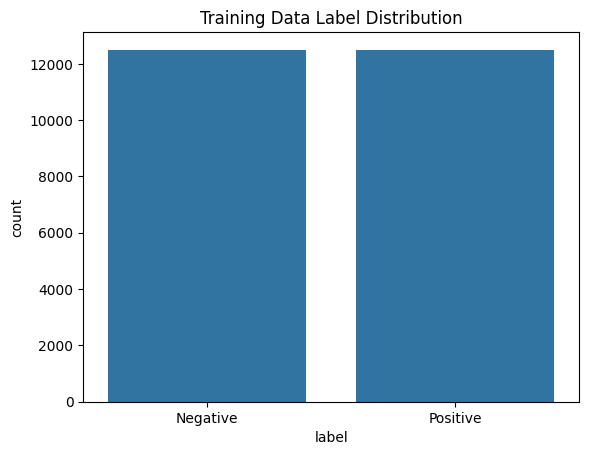

In [6]:
sns.countplot(x='label', data=train_df)
plt.title('Training Data Label Distribution')
plt.xticks([0,1], ['Negative', 'Positive'])
plt.show()

### Review Length Analysis

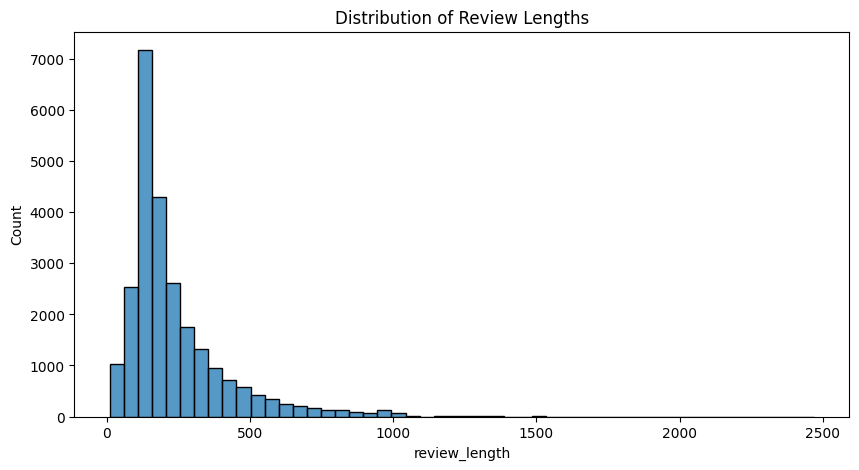

In [7]:
train_df['review_length'] = train_df['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,5))
sns.histplot(train_df['review_length'], bins=50)
plt.title('Distribution of Review Lengths')
plt.show()

### Save DataFrames for Next Notebook

In [8]:
train_df.to_csv('../data/raw_train.csv', index=False)
test_df.to_csv('../data/raw_test.csv', index=False)